# EDA

In [1]:
from data_fetcher import TweetGenerator, ReturnFactorsGenerator
from config import load_config
import pandas as pd
from utils import DataMode


pd.set_option("display.max_rows", None, "display.max_columns", None) 
configuration = load_config(0)

a = TweetGenerator(DataMode.TRAINING, configuration, pre_process=False)

In [3]:
len(a.data.dropna())

122

In [16]:
a.data.rename(columns = {'Unnamed: 2_level_1':  ''}, level=1).head(16)

date sentiment_score                                \
                                          mean       std  mean_n_1  mean_n_2   
period                                                                         
0.0    0   2021-02-06 12:00:00       -0.700842  0.684960 -0.598955 -0.687704   
       1   2021-02-07 00:00:00       -0.671336  0.716525 -0.700842 -0.598955   
       2   2021-02-07 12:00:00       -0.719376  0.656899 -0.671336 -0.700842   
       3   2021-02-08 00:00:00       -0.588452  0.780619 -0.719376 -0.671336   
       4   2021-02-08 12:00:00       -0.706171  0.671077 -0.588452 -0.719376   
       5   2021-02-09 00:00:00       -0.636872  0.735713 -0.706171 -0.588452   
       6   2021-02-09 12:00:00       -0.678629  0.702653 -0.636872 -0.706171   
       7   2021-02-10 00:00:00       -0.657222  0.724949 -0.678629 -0.636872   
       8   2021-02-10 12:00:00       -0.728808  0.648842 -0.657222 -0.678629   
       9   2021-02-11 00:00:00             NaN       NaN -0.728808 -0.657222   
       10  2021-02-11 12:00:00             NaN       NaN       NaN -0.728808   
       11  2021-02-12 00:00:00             NaN       NaN       NaN       NaN   
       12  2021-02-12 12:00:00             NaN       NaN       NaN       NaN   
       13  2021-02-13 00:00:00       -0.714222  0.668727       NaN       NaN   
       14  2021-02-13 12:00:00       -0.737830  0.642804 -0.714222       NaN   
       15  2021-02-14 00:00:00       -0.602084  0.771975 -0.737830 -0.714222   

                     
           mean_n_3  
period               
0.0    0  -0.770725  
       1  -0.687704  
       2  -0.598955  
       3  -0.700842  
       4  -0.671336  
       5  -0.719376  
       6  -0.588452  
       7  -0.706171  
       8  -0.636872  
       9  -0.678629  
       10 -0.657222  
       11 -0.728808  
       12       NaN  
       13       NaN  
       14       NaN  
       15       NaN

In [1]:
from data_fetcher import TweetGenerator, ReturnFactorsGenerator

ReturnFactorsGenerator(configuration, True)

ImportError: cannot import name 'TrendReqs' from 'pytrends.request' (C:\Users\user\miniconda3\envs\sentiment\lib\site-packages\pytrends\request.py)

In [13]:
def _time_travel(df):
        #print(df.columns)
        new_df = df.iloc[3:].copy()
        for i in range(1, 3+1):
            #print(df.iloc[(3-i):-i].loc[:, ('sentiment_score', 'mean')].tolist()[:3])
            new_df.loc[:, ('sentiment_score', 'mean_n_'+str(i))] =  df.iloc[(3-i):-i].loc[:, ('sentiment_score', 'mean')].tolist()
        return new_df.reset_index(drop=True)

_time_travel(a.data).head(10), a.data.head(10)

MultiIndex([(           'date',         ''),
            ('sentiment_score',     'mean'),
            ('sentiment_score',      'std'),
            ('sentiment_score', 'mean_n_1'),
            ('sentiment_score', 'mean_n_2'),
            ('sentiment_score', 'mean_n_3')],
           )


AttributeError: 'list' object has no attribute 'head'

In [9]:
import pandas as pd


f = pd.read_csv(a.path_preprocessed, index_col=[0, 1], header = [0,1])
f


date sentiment_score                                \
             Unnamed: 2_level_1            mean       std  mean_n_1  mean_n_2   
period                                                                          
0.0    0    2021-02-06 12:00:00       -0.992678       NaN -0.992678 -0.992678   
       1    2021-02-07 00:00:00             NaN       NaN       NaN       NaN   
       2    2021-02-07 12:00:00             NaN       NaN       NaN       NaN   
       3    2021-02-08 00:00:00       -0.993056       NaN -0.993056 -0.993056   
       4    2021-02-08 12:00:00       -0.328289  1.024619 -0.328289 -0.328289   
       5    2021-02-09 00:00:00       -0.019481  1.368857 -0.019481 -0.019481   
       6    2021-02-09 12:00:00        0.009785  1.395352  0.009785  0.009785   
       7    2021-02-10 00:00:00             NaN       NaN       NaN       NaN   
       8    2021-02-10 12:00:00       -0.987080       NaN -0.987080 -0.987080   
       9    2021-02-11 00:00:00             NaN       NaN       NaN       NaN   
       10   2021-02-11 12:00:00             NaN       NaN       NaN       NaN   
       11   2021-02-12 00:00:00             NaN       NaN       NaN       NaN   
       12   2021-02-12 12:00:00             NaN       NaN       NaN       NaN   
       13   2021-02-13 00:00:00             NaN       NaN       NaN       NaN   
       14   2021-02-13 12:00:00       -0.988005       NaN -0.988005 -0.988005   
       15   2021-02-14 00:00:00       -0.991562       NaN -0.991562 -0.991562   
       16   2021-02-14 12:00:00       -0.682359       NaN -0.682359 -0.682359   
       17   2021-02-15 00:00:00             NaN       NaN       NaN       NaN   
       18   2021-02-15 12:00:00       -0.991303  0.009635 -0.991303 -0.991303   
       19   2021-02-16 00:00:00             NaN       NaN       NaN       NaN   
       20   2021-02-16 12:00:00             NaN       NaN       NaN       NaN   
       21   2021-02-17 00:00:00             NaN       NaN       NaN       NaN   
       22   2021-02-17 12:00:00             NaN       NaN       NaN       NaN   
       23   2021-02-18 00:00:00       -0.977836       NaN -0.977836 -0.977836   
       24   2021-02-18 12:00:00       -0.994885       NaN -0.994885 -0.994885   
       25   2021-02-19 00:00:00       -0.998425       NaN -0.998425 -0.998425   
       26   2021-02-19 12:00:00       -0.031329  1.112798 -0.031329 -0.031329   
       27   2021-02-20 00:00:00             NaN       NaN       NaN       NaN   
       28   2021-02-20 12:00:00             NaN       NaN       NaN       NaN   
       29   2021-02-21 00:00:00             NaN       NaN       NaN       NaN   
       30   2021-02-21 12:00:00             NaN       NaN       NaN       NaN   
       31   2021-02-22 00:00:00             NaN       NaN       NaN       NaN   
       32   2021-02-22 12:00:00       -0.988630       NaN -0.988630 -0.988630   
       33   2021-02-23 00:00:00             NaN       NaN       NaN       NaN   
       34   2021-02-23 12:00:00             NaN       NaN       NaN       NaN   
       35   2021-02-24 00:00:00             NaN       NaN       NaN       NaN   
       36   2021-02-24 12:00:00             NaN       NaN       NaN       NaN   
       37   2021-02-25 00:00:00             NaN       NaN       NaN       NaN   
       38   2021-02-25 12:00:00             NaN       NaN       NaN       NaN   
       39   2021-02-26 00:00:00             NaN       NaN       NaN       NaN   
       40   2021-02-26 12:00:00             NaN       NaN       NaN       NaN   
       41   2021-02-27 00:00:00             NaN       NaN       NaN       NaN   
       42   2021-02-27 12:00:00             NaN       NaN       NaN       NaN   
       43   2021-02-28 00:00:00             NaN       NaN       NaN       NaN   
       44   2021-02-28 12:00:00       -0.966089       NaN -0.966089 -0.966089   
       45   2021-03-01 00:00:00             NaN       NaN       NaN       NaN   
       46   2021-03-01 12:00:00             NaN       NaN 

In [12]:
list(range(5, 0, -1))

[5, 4, 3, 2, 1]

In [13]:
a.data.sample(5)

date sentiment_score          
                                         mean       std
period                                                 
0.0    19 2021-10-27 12:00:00       -0.290354  0.981466
1.0    29 2021-11-18 12:00:00       -0.667812  0.765163
       13 2021-11-10 12:00:00             NaN       NaN
       40 2021-11-24 00:00:00             NaN       NaN
       7  2021-11-07 12:00:00             NaN       NaN

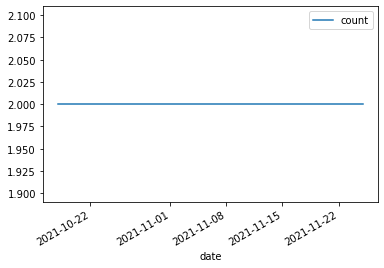

In [14]:
import pandas as pd

t = pd.to_datetime(a.data['date'], errors="coerce", infer_datetime_format=True).dt.floor("d").value_counts().rename_axis('date').reset_index(name='count')
t.plot(x="date", y="count")

In [15]:
t

,date,count
0,2021-10-25,2
1,2021-11-10,2
2,2021-11-12,2
3,2021-10-24,2
4,2021-11-24,2
5,2021-11-05,2
6,2021-11-17,2
7,2021-10-29,2
8,2021-10-22,2
9,2021-11-25,2


In [16]:
t.date.min(), t.date.max()

(Timestamp('2021-10-18 00:00:00'), Timestamp('2021-11-25 00:00:00'))

2


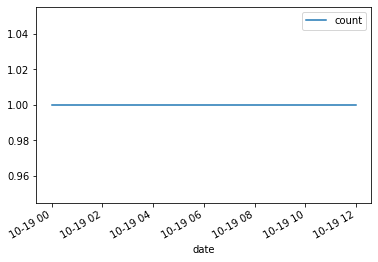

In [17]:
f = a.data[(a.data["date"] >= "2021-10-19 00:00:00") & (a.data["date"] < "2021-10-20 00:00:00")]
print(len(f))
pd.to_datetime(f['date'], errors="coerce", infer_datetime_format=True).dt.floor("h").value_counts().rename_axis('date').reset_index(name='count').plot(x="date", y="count", )

In [18]:
list(range(0, 750, 256))

[0, 256, 512]